# Chapter 4 - Training Models

* Polynomial Regression is more prone to overfitting as it has more parameters than Linear Regression

# Linear Regression

### testing the Normal Equation:

a closed-form solution to find the value of parameters(theata) that minimizes the cost function

In [1]:
import numpy as np

In [2]:
X = 2* np.random.rand(100,1) # generates 100x1 array of numbers bw 2*(0 and 1)
y = 4 + 3*X + np.random.randn(100,1) # generates a 100x1 array of numbers from the standard normal distribution - Gaussian Noise

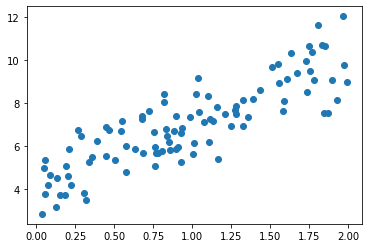

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.show()

In [4]:
X_b = np.c_[np.ones((100,1)), X] # add x0 =1 to each instance
# numpy.c_ : Translates slice objects to concatenation along the second axis.

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[4.15820066],
       [2.92566123]])

In [6]:
# let's predict with this model

X_new = np.array([[0], [2]]) 
X_new_b = np.c_[np.ones((2,1)), X_new] # x0 = 1
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.15820066],
       [10.00952312]])

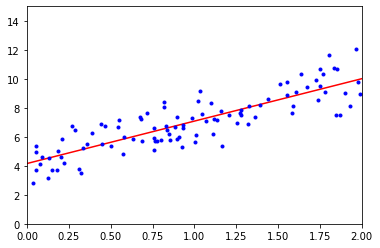

In [7]:
# plotting this regression Line
plt.plot(X_new, y_predict, 'r-')
plt.plot(X,y, "b.")
plt.axis([0,2,0,15]) # setting the minimum and max values on both the axis
plt.show()

## Using SkLearn

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_predict = lin_reg.predict(X_new)

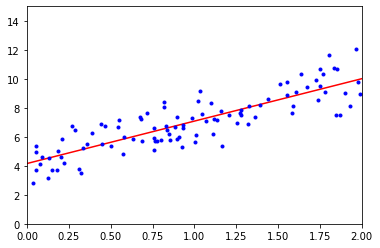

In [9]:
# plotting this regression Line
plt.plot(X_new, y_predict, 'r-')
plt.plot(X,y, "b.")
plt.axis([0,2,0,15]) # setting the minimum and max values on both the axis
plt.show()

## Gradient Descent:

- General Optimization algo

- tweak the parameters iteratively in order to minimize a cost function

- Random initialization

* Learning Rate (important parameter):

    - Too small : Many iterations to converge

    - Too big: Might make the algo diverge with larger and larger values, failing to find a good solution.

- Random Initilaization can lead to cases when the algo reaches a local minima and stops.

* For Linear Regression the cost function is convex function.

    - No local minimas

    - Continuous function with no abrupt changes

> Important: When using GD, make sure that the features have a similar scale, otherwise it will take longer time to learn.

## Batch Gradient Descent

- Uses the whole batch of training data at every step 
- Terribly slow on very large training data
- One big problem is to decide how many iterations are enough
    - Solution: Early stopping: Stop when the gradient vector becomes tiny ( threshold ) . This happens when GD has (almost) reached the minimum

## Stochastic Gradient Descent

- Picks a random instance in the training set at every step
- Very fast
- Can train on large datasets


Drawbacks:
- Much less regular than BGD
- Therefore hopes araound a lot, decreasing only on average.
- It will get close to minimum but will not settle down and keep bouncing .
- So once the algo stops, it will give us good param values but not optimal.

Advantage:
+ If the cost fn is irregular, it would be more likely top bounce out of the loacl minima
+ Hence more likely to find global minima




**Solution** 


Simulated Annealing using a learning schedule(function):

Decrease the learning rate as per the learning schedule after each epoch.

Large learning rate will help in skipping local minimas and small learning rate will help in converging earlier.

**Don't forget to shuffle the training data fter each epoch to avoid same instance being picked up again**


In [10]:
# Implementing SGD:
from sklearn.linear_model import SGDRegressor # can be used for Batch, Mini-batch as well by adding apt params

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1) # penalty - regularization
sgd_reg.fit(X,y.ravel()) # The numpy.ravel() functions returns contiguous flattened array(1D array with all the input-array elements and with the same type as it) here- it changed y ([100,1]) to y.ravel() ([100])

SGDRegressor(eta0=0.1, penalty=None)

In [11]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.19220503]), array([2.94119526]))

## Mini-Batch Gradient Descent
- Computes gradients on small randoms ets of instances called mini batches.
- Main advantage is : performance boost from hw optimization of matrix operations, especially when using GPUs
- It will walk closer to the minimum
- But it may be harder for it to escape from local minima problem

# Polynomial Regression
- Add powers of each feature as new features, then train a linear model on this extended set of features

In [12]:
# Implementation
m = 100
X = 6* np.random.rand(m, 1) - 3
y = 0.5* X**2 + X +2 + np.random.randn(m,1)

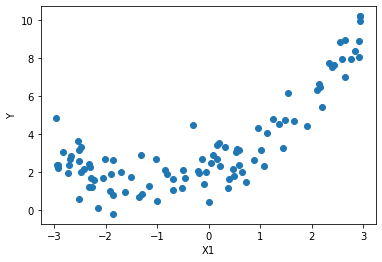

In [13]:
plt.scatter(X,y)
plt.xlabel('X1')
plt.ylabel('Y')
plt.show()

In [14]:
# We need to transform our training data as we have only one feature and we need to add the square of that feature as another feature

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]


array([0.52254283])

In [15]:
X_poly[0]

array([0.52254283, 0.27305101])

In [16]:
# Now fitting the linear regressor :
lin_reg = LinearRegression().fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.0186533]), array([[1.07780441, 0.46735279]]))

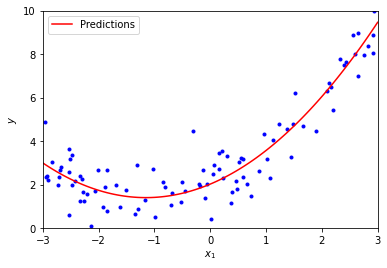

In [17]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$")
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.show()

### Note: 
The polynomial features function adds all combinations of the features upto the given degree

eg. features = a,b and degree=2

Combinations added: a^2, b^2, a*b

# Regularized Linear Models
Fewere DoF => harder to overfit the data

1. Ridge
2. Lasso
3. Elastic Net
4. Early Stopping
Most Regularized models require the data to be scaled to perform better

## 1. Ridge Regression
Regularization term added to Cost Function during training only

Hyperparameter alpha : extent of regularization wanted



In [19]:
# Ridge regression using closed-form equation
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver = 'cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])


array([[5.13145621]])

In [21]:
# Ridge Regression using Gradient DEscent:
sdg_reg = SGDRegressor(penalty='l2') 
# setting the type of regularization term. specifying l2 tells SGd to add 1/2 of l2 norm of the weight vector in the cost function
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])


array([5.35357492])

## 2. Lasso Regression
**Least Absolute Shrinkage and Selection Operator Regression**

-> uses l1 norm of the weight

**Imp.: ** It tends to remove the weights of least important features by setting them to 0
- In other words, it performs **feature selection** and outputs a sparse model


In [25]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])


array([5.08604691])

In [26]:
# OR
sdg_reg = SGDRegressor(penalty='l1') 
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.08164902])

## 3. Elastic Net
- A middle ground bw ridge and lasso
- Regularization term is a mix of l1 and l2
- The mix ratio (r) can be controlled
    - r=0: ridge regressin
    - r=1: lasso regression

In [27]:
from sklearn.linear_model import ElasticNet

el_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
el_net.fit(X,y)
el_net.predict([[1.5]])

array([5.08630585])

## Which Regressor to choose ?
- Preferred to have at least some regularization
- Ridge is a good default
- But when u know that only some features are important then go for Lasso / ElasticNet
- Elastic net are preferred over lasso because lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated

## 4. Early Stopping
- aka "beautiful free lunch" : Geoffrey Hinton
- stop training as soon as the val error reaches a min
- in SGD or MBGD, the curves will not be smooth and fincinf the point to stop will be difficult
    - one approach is to stop after some time the minimum is reached then roll back to that config of params

# Logistic Regression / Logit Regression - Classifier